# Astronomical Coordinate Transformation with Astropy

This notebook demonstrates coordinate transformation between different astronomical reference frames using Astropy. It will:

1. Generate random RA/Dec coordinates
2. Save them to a CSV file
3. Load and transform them to Galactic and Ecliptic coordinates
4. Save the transformed coordinates
5. Visualize all coordinate systems using Mollweide projection

## Import Required Libraries

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, ICRS, Galactic, GeocentricTrueEcliptic
import astropy.units as u

## Generate Random Astronomical Coordinates

Generate a set of random RA (0 to 360 degrees) and Dec (-90 to +90 degrees) coordinates.

In [9]:
# Generate random coordinates
np.random.seed(42)  # For reproducibility
n_points = 10

# Generate random RA (0 to 360 degrees) and Dec (-90 to +90 degrees)
ra = np.random.uniform(0, 360, n_points)
dec = np.arcsin(np.random.uniform(-1, 1, n_points)) * 180 / np.pi  # Use arcsin for uniform distribution on sphere

# Create a DataFrame
coords_df = pd.DataFrame({
    'RA': ra,
    'DEC': dec
})

# Save to CSV
coords_df.to_csv('original_coordinates.csv', index=False)

print("Generated and saved coordinates to 'original_coordinates.csv'")
print("\nFirst few rows:")
print(coords_df.head())

Generated and saved coordinates to 'original_coordinates.csv'

First few rows:
           RA        DEC
0  134.834443 -73.502275
1  342.257150  70.021300
2  263.517819  41.673525
3  215.517054 -35.122170
4   56.166711 -39.520188


## Transform Coordinates

Now we'll use `astropy.coordinates.SkyCoord` to transform the coordinates from ICRS (RA/Dec) to Galactic and Ecliptic frames.

In [10]:
# Create SkyCoord object from the DataFrame
coords = SkyCoord(ra=coords_df['RA'], dec=coords_df['DEC'], unit='deg', frame='icrs')

# Transform to Galactic coordinates
galactic = coords.transform_to('galactic')

# Transform to Ecliptic coordinates
ecliptic = coords.transform_to('geocentrictrueecliptic')

# Create DataFrame with all coordinate systems
transformed_coords = pd.DataFrame({
    'RA': coords.ra.deg,
    'DEC': coords.dec.deg,
    'GLON': galactic.l.deg,
    'GLAT': galactic.b.deg,
    'ELON': ecliptic.lon.deg,
    'ELAT': ecliptic.lat.deg
})

# Save transformed coordinates to CSV
transformed_coords.to_csv('transformed_coordinates.csv', index=False)

print("Saved transformed coordinates to 'transformed_coordinates.csv'")
print("\nFirst few rows:")
print(transformed_coords.head())

Saved transformed coordinates to 'transformed_coordinates.csv'

First few rows:
           RA        DEC        GLON       GLAT        ELON       ELAT
0  134.834443 -73.502275  288.288271 -17.660439  224.467100 -73.697437
1  342.257150  70.021300  112.771307   9.602508   40.540972  64.651322
2  263.517819  41.673525   67.129765  31.557229  258.536658  64.853492
3  215.517054 -35.122170  323.135539  24.168894  224.952370 -19.804317
4   56.166711 -39.520188  243.328329 -52.162055   37.935575 -57.009964


## Visualize Coordinates

Now we'll create a Mollweide projection plot showing all three coordinate systems (ICRS, Galactic, and Ecliptic).

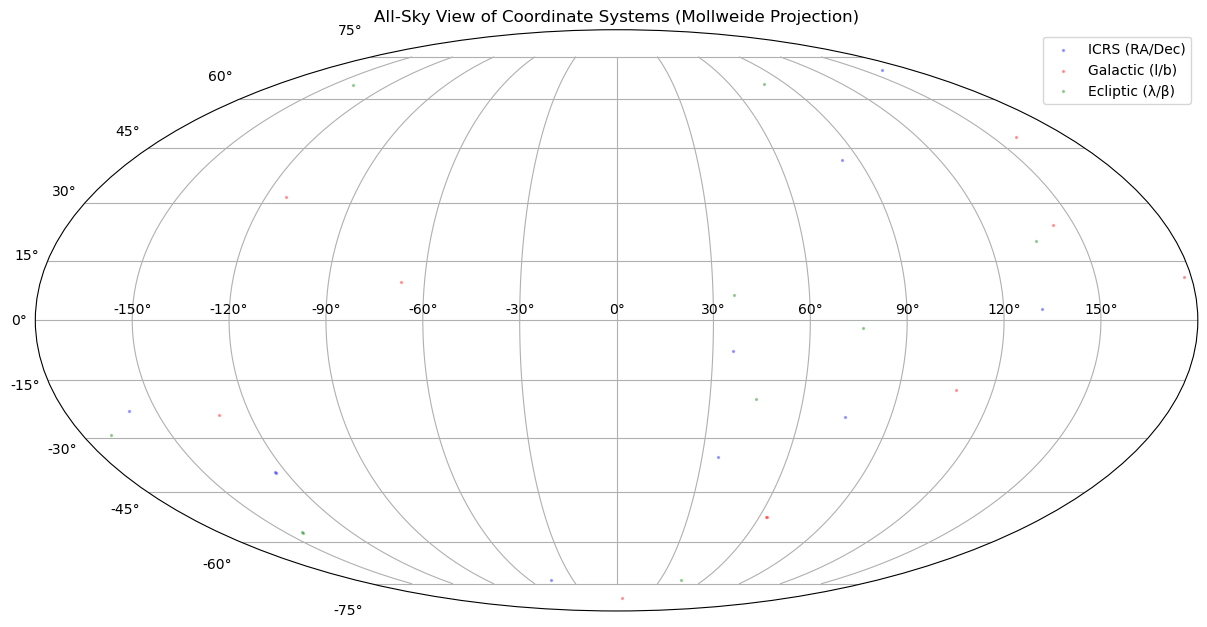

In [ ]:
# Create Mollweide projection plot
plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection='mollweide')

# Plot ICRS coordinates (convert RA to radians and center at 0)
ra_rad = (transformed_coords['RA'] - 180) * np.pi / 180
dec_rad = transformed_coords['DEC'] * np.pi / 180
ax.scatter(ra_rad, dec_rad, c='blue', alpha=0.3, s=20, label='ICRS (RA/Dec)')

# Plot Galactic coordinates
glon_rad = (transformed_coords['GLON'] - 180) * np.pi / 180
glat_rad = transformed_coords['GLAT'] * np.pi / 180
ax.scatter(glon_rad, glat_rad, c='red', alpha=0.3, s=20, label='Galactic (l/b)')

# Plot Ecliptic coordinates
elon_rad = (transformed_coords['ELON'] - 180) * np.pi / 180
elat_rad = transformed_coords['ELAT'] * np.pi / 180
ax.scatter(elon_rad, elat_rad, c='green', alpha=0.3, s=20, label='Ecliptic (λ/β)')

# Customize the plot
ax.grid(True)
plt.legend(loc='upper right')
plt.title('All-Sky View of Coordinate Systems (Mollweide Projection)')

# Save the plot
plt.savefig('coordinate_systems.png', dpi=300, bbox_inches='tight')
plt.show()

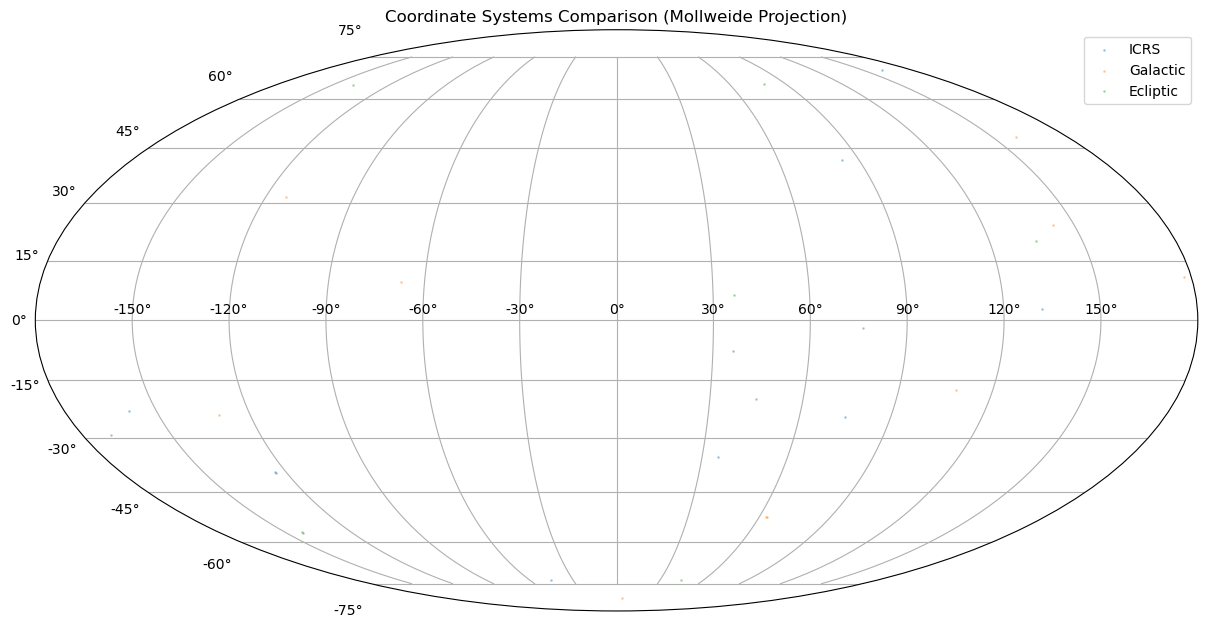

In [12]:
# Set up the plot
plt.figure(figsize=(15, 10))

# Create Mollweide projection
ax = plt.subplot(111, projection='mollweide')

# Plot each coordinate system
# Convert longitudes to radians and shift range from [0,360] to [-180,180]
plt.scatter((transformed_coords['RA'] - 180) * np.pi / 180, 
           transformed_coords['DEC'] * np.pi / 180, 
           alpha=0.3, label='ICRS', s=1)

plt.scatter((transformed_coords['GLON'] - 180) * np.pi / 180,
           transformed_coords['GLAT'] * np.pi / 180,
           alpha=0.3, label='Galactic', s=1)

plt.scatter((transformed_coords['ELON'] - 180) * np.pi / 180,
           transformed_coords['ELAT'] * np.pi / 180,
           alpha=0.3, label='Ecliptic', s=1)

# Customize the plot
plt.grid(True)
plt.legend()
plt.title('Coordinate Systems Comparison (Mollweide Projection)')

# Save the plot
plt.savefig('coordinate_systems.png', dpi=300, bbox_inches='tight')
plt.show()